# Načtení datasetu


In [80]:
import pandas as pd
data = pd.read_csv("diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data exploration

### Četnosti cílové proměnné

Text(0.5, 1.0, 'Cílová proměnná má_diabetes')

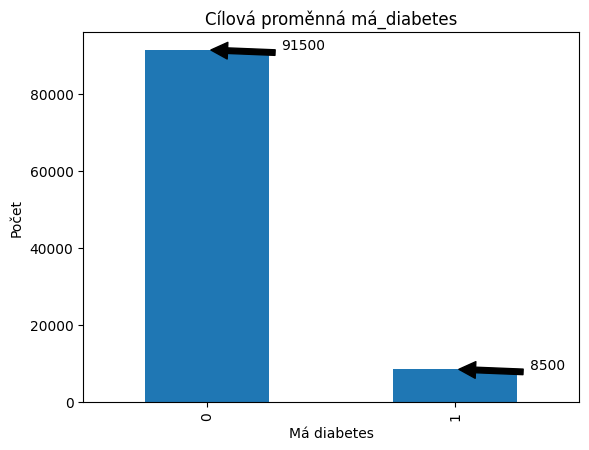

In [81]:
import matplotlib.pyplot as plt
#bar plot X axis = diabetes classes Y axis = count
data.groupby('diabetes').size().plot(kind='bar')
plt.xlabel('Má diabetes')
plt.ylabel('Počet')
count_diabetes_0 = data[data['diabetes'] == 0].shape[0]
count_diabetes_1 = data[data['diabetes'] == 1].shape[0]
plt.annotate(count_diabetes_0,xy=(0, count_diabetes_0),xytext=(0.3, count_diabetes_0),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(count_diabetes_1,xy=(1, count_diabetes_1),xytext=(1.3, count_diabetes_1),arrowprops=dict(facecolor='black', shrink=0.05))
plt.title("Cílová proměnná má_diabetes")




Cílová proměnná je v datasetu nevyvážená. Budeme muset provést oversampling.

### Histogramy ostatních proměnných

Text(0, 0.5, 'Četnost')

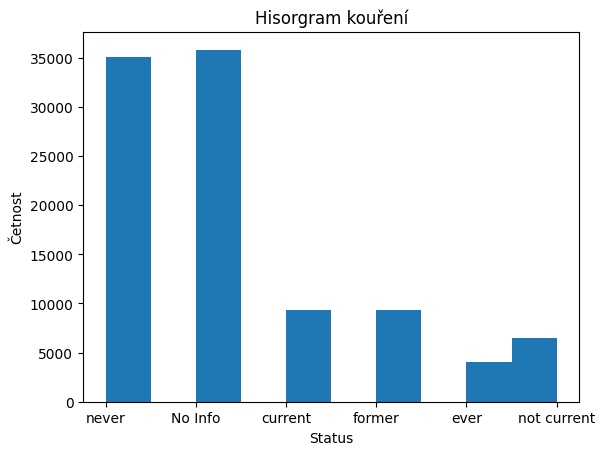

In [82]:
plt.hist(data['smoking_history'])
plt.title("Hisorgram kouření")
plt.xlabel("Status")
plt.ylabel("Četnost")

Dataset obsahuje spoustu prázdných hodnot {No info}

Text(0, 0.5, 'Četnost')

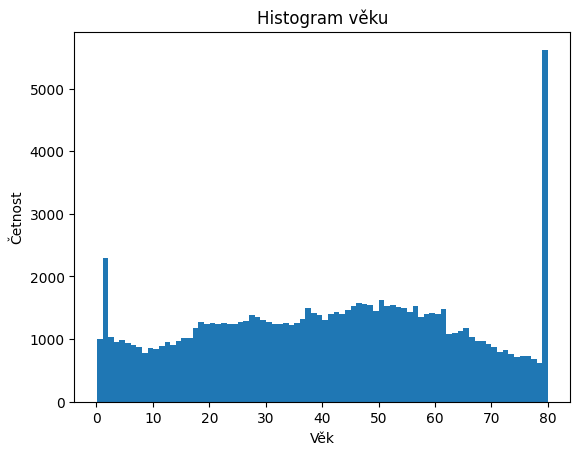

In [83]:
plt.hist(data['age'], bins=80)
plt.title("Histogram věku")
plt.xlabel("Věk")
plt.ylabel("Četnost")

In [117]:
import statistics
data['age_category'] = pd.cut(data['age'], bins=[0, 10, 20, 30, 40, 50, 60,70,80,], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80'])
print(statistics.mode(data['age_category']))
statistics.mode(data['age'])


51-60


80.0

Njevíce je zastoupeno věkové rozmezí 51-60 let. 
Pro jeden konkrétní věk je to 80 let.

Text(0.5, 0, 'BMI')

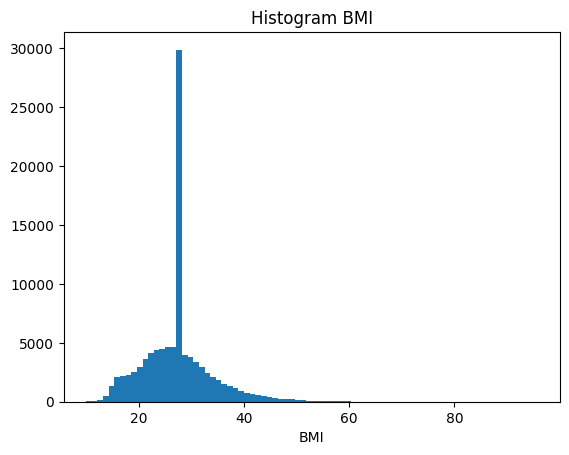

In [85]:
plt.hist(data['bmi'], bins=80)
plt.title("Histogram BMI")
plt.xlabel("BMI")


Text(0, 0.5, 'Četnost')

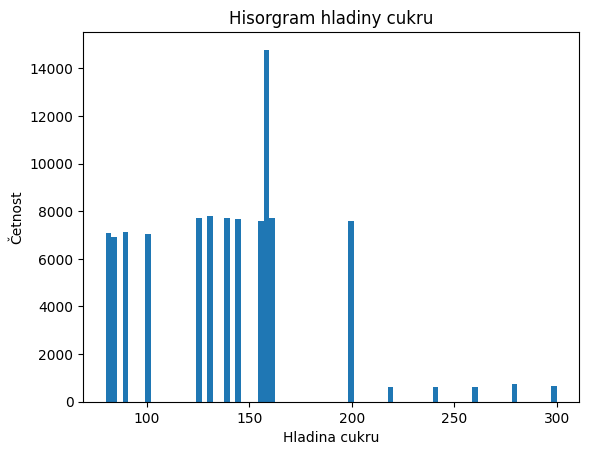

In [86]:
plt.hist(data['blood_glucose_level'], bins=80)
plt.title("Hisorgram hladiny cukru")
plt.xlabel("Hladina cukru")
plt.ylabel("Četnost")


### Korelační grafy



Text(0, 0.5, 'Má diabetes')

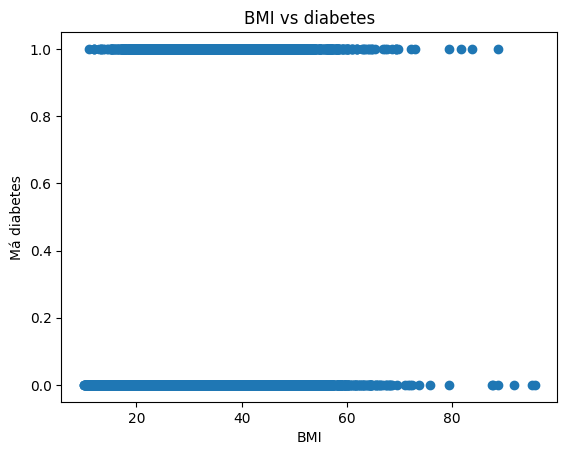

In [87]:
plt.scatter(data['bmi'],data['diabetes'])
plt.title("BMI vs diabetes")
plt.xlabel("BMI")
plt.ylabel("Má diabetes")


Text(0, 0.5, 'Má diabetes')

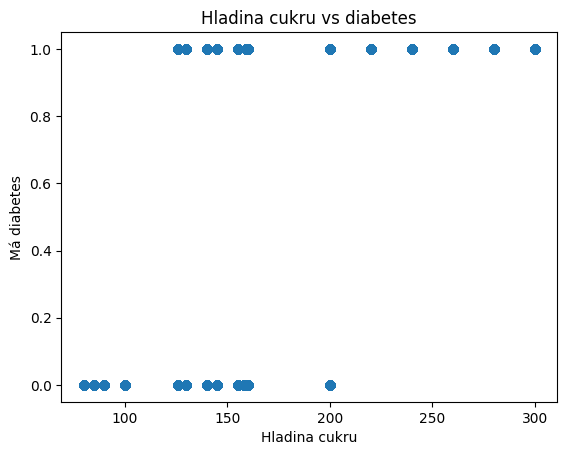

In [88]:
plt.scatter(data['blood_glucose_level'],data['diabetes'])
plt.title("Hladina cukru vs diabetes")
plt.xlabel("Hladina cukru")
plt.ylabel("Má diabetes")

Čím vyšší hladina cukru tím větší výskyt cukrovky
